In [3]:
import scanpy as sc

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
import os

os.makedirs("../results/figures", exist_ok=True)
os.makedirs("../results/tables", exist_ok=True)

print("Folders ready:")
print(os.path.abspath("../results/figures"))
print(os.path.abspath("../results/tables"))

Folders ready:
C:\Users\faizm\Documents\GSE173231_scRNAseq_Stress_Analysis\results\figures
C:\Users\faizm\Documents\GSE173231_scRNAseq_Stress_Analysis\results\tables


In [9]:
# reading scRNA breast cancer data

adata= sc.read_10x_mtx('data/GSE173231/')

FileNotFoundError: Did not find file data\GSE173231\matrix.mtx.gz.

In [ ]:
adata

In [ ]:
#Inspecting metadata in anndata objects

adata.obs.head()

In [ ]:
adata.var.head()

In [ ]:
# Identifying mitochondrial genes

adata.var['mt']=adata.var_names.str.startswith('MT-')

In [ ]:
adata.var.head(30)

In [10]:
sc.pp.filter_genes(adata,min_cells=3)
sc.pp.filter_cells(adata,min_genes=200)

In [11]:
#computing QC

sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'],inplace=True)

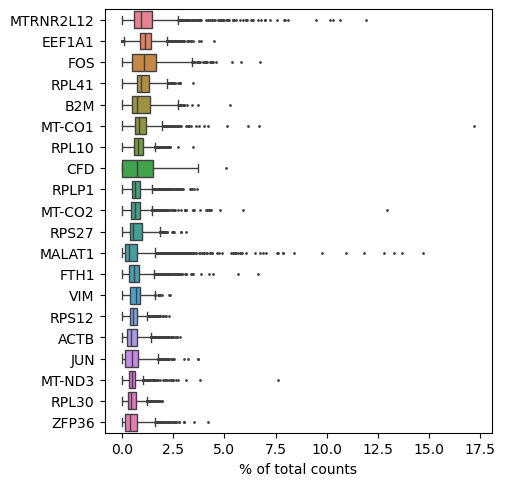

In [12]:
# Genes yeilding highest fraction of count cell wise

sc.pl.highest_expr_genes(adata,n_top=20)

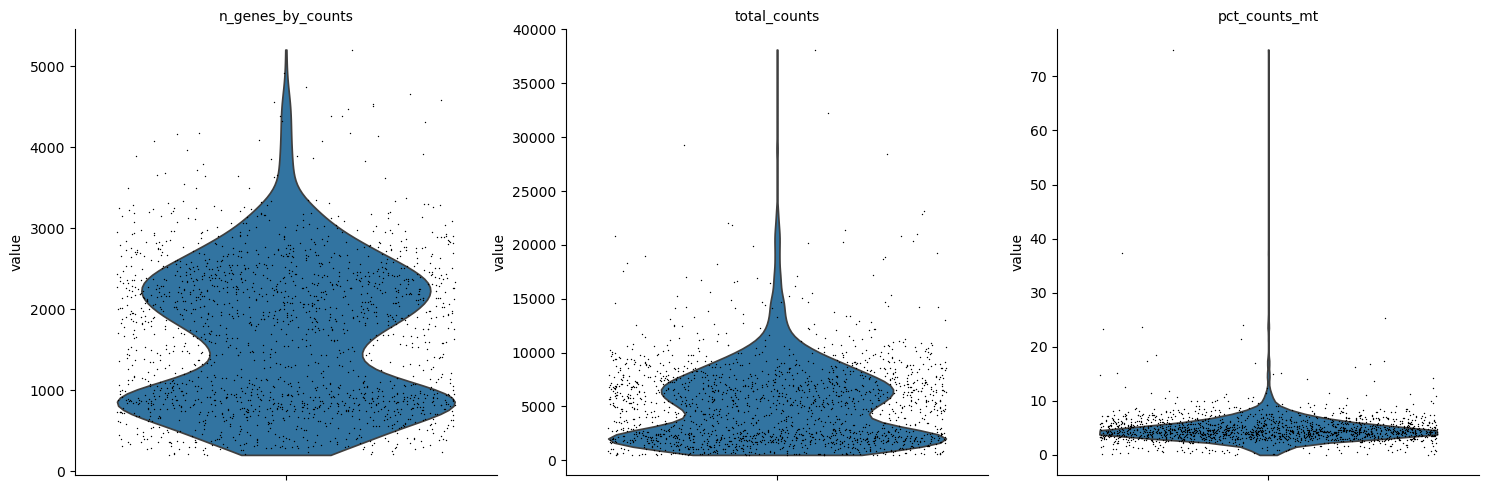

In [13]:
# Violin plot visualization of total counts vs gene vs mt count

sc.pl.violin(adata, ['n_genes_by_counts','total_counts','pct_counts_mt'],jitter=0.4,multi_panel=True)

In [2]:

plt.savefig("../results/figures/violin_plot_counts.png", dpi=300, bbox_inches="tight")
plt.close()


NameError: name 'plt' is not defined

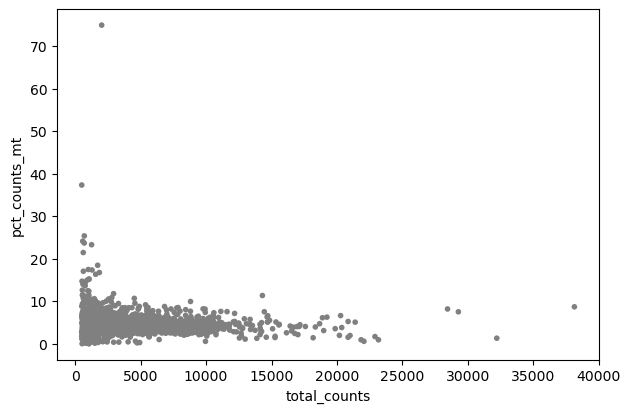

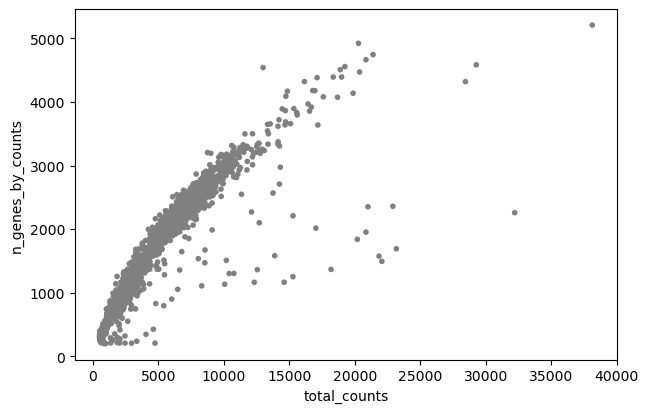

In [14]:
sc.pl.scatter(adata,x='total_counts',y='pct_counts_mt')
sc.pl.scatter(adata,x='total_counts',y='n_genes_by_counts')

In [15]:
# Filtering low quality cells on the basis of violin plots:
adata=adata[(adata.obs.n_genes_by_counts<3500) & (adata.obs.n_genes_by_counts > 600) & (adata.obs.pct_counts_mt < 10),:,].copy()


In [16]:
adata

AnnData object with n_obs × n_vars = 1574 × 16500
    obs: 'n_genes', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt'
    var: 'gene_ids', 'feature_types', 'mt', 'n_cells', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'

In [17]:
#Normalization


sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)
adata.raw=adata.copy()




In [18]:
#identifying variable genes

sc.pp.highly_variable_genes(adata)
adata=adata[:,adata.var.highly_variable]
adata.X.shape

(1574, 2761)

In [19]:

sc.pp.scale(adata,max_value=10)

C:\Users\faizm\miniconda3\envs\scanpy\lib\site-packages\scanpy\preprocessing\_scale.py:309: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
C:\Users\faizm\miniconda3\envs\scanpy\lib\functools.py:889: UserWarning: zero-centering a sparse array/matrix densifies it.
  return dispatch(args[0].__class__)(*args, **kw)


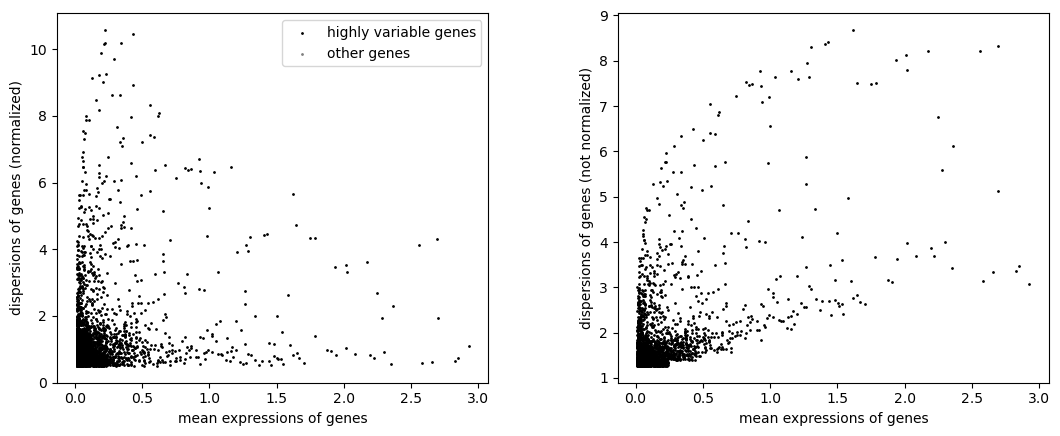

In [20]:
sc.pl.highly_variable_genes(adata)

In [21]:
#PCA

sc.tl.pca(adata, svd_solver='arpack')
sc.pp.neighbors(adata,n_pcs=30)

C:\Users\faizm\miniconda3\envs\scanpy\lib\site-packages\threadpoolctl.py:1226: RuntimeWarning: 
Found Intel OpenMP ('libiomp') and LLVM OpenMP ('libomp') loaded at
the same time. Both libraries are known to be incompatible and this
can cause random crashes or deadlocks on Linux when loaded in the
same Python program.
Using threadpoolctl may cause crashes or deadlocks. For more
information and possible workarounds, please see
    https://github.com/joblib/threadpoolctl/blob/master/multiple_openmp.md

  warnings.warn(msg, RuntimeWarning)


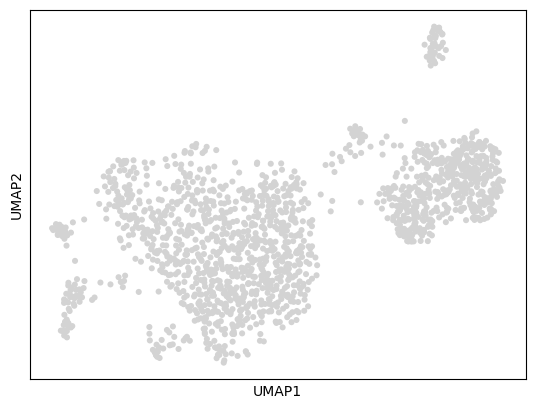

In [22]:
sc.pp.neighbors(adata)
sc.tl.umap(adata)
sc.pl.umap(adata)

In [40]:
!pip3 install igraph

   ---------------------------------------- 0.0/3.2 MB ? eta -:--:--
   ------ --------------------------------- 0.5/3.2 MB 4.2 MB/s eta 0:00:01
   ------------- -------------------------- 1.0/3.2 MB 4.2 MB/s eta 0:00:01
   -------------------------- ------------- 2.1/3.2 MB 4.3 MB/s eta 0:00:01
   ---------------------------------------- 3.2/3.2 MB 4.4 MB/s  0:00:00

   -------------------- ------------------- 1/2 [igraph]
   -------------------- ------------------- 1/2 [igraph]
   -------------------- ------------------- 1/2 [igraph]
   -------------------- ------------------- 1/2 [igraph]
   -------------------- ------------------- 1/2 [igraph]
   -------------------- ------------------- 1/2 [igraph]
   -------------------- ------------------- 1/2 [igraph]
   -------------------- ------------------- 1/2 [igraph]
   -------------------- ------------------- 1/2 [igraph]
   -------------------- ------------------- 1/2 [igraph]
   ---------------------------------------- 2/2 [igraph]



In [60]:
# Checking clusters for cell type,cell states at various resolutions
for res in [0.2,0.4,0.6,0.8,1,1.5]:
    sc.tl.leiden(adata,resolution=res,key_added=f'leiden_{res}')

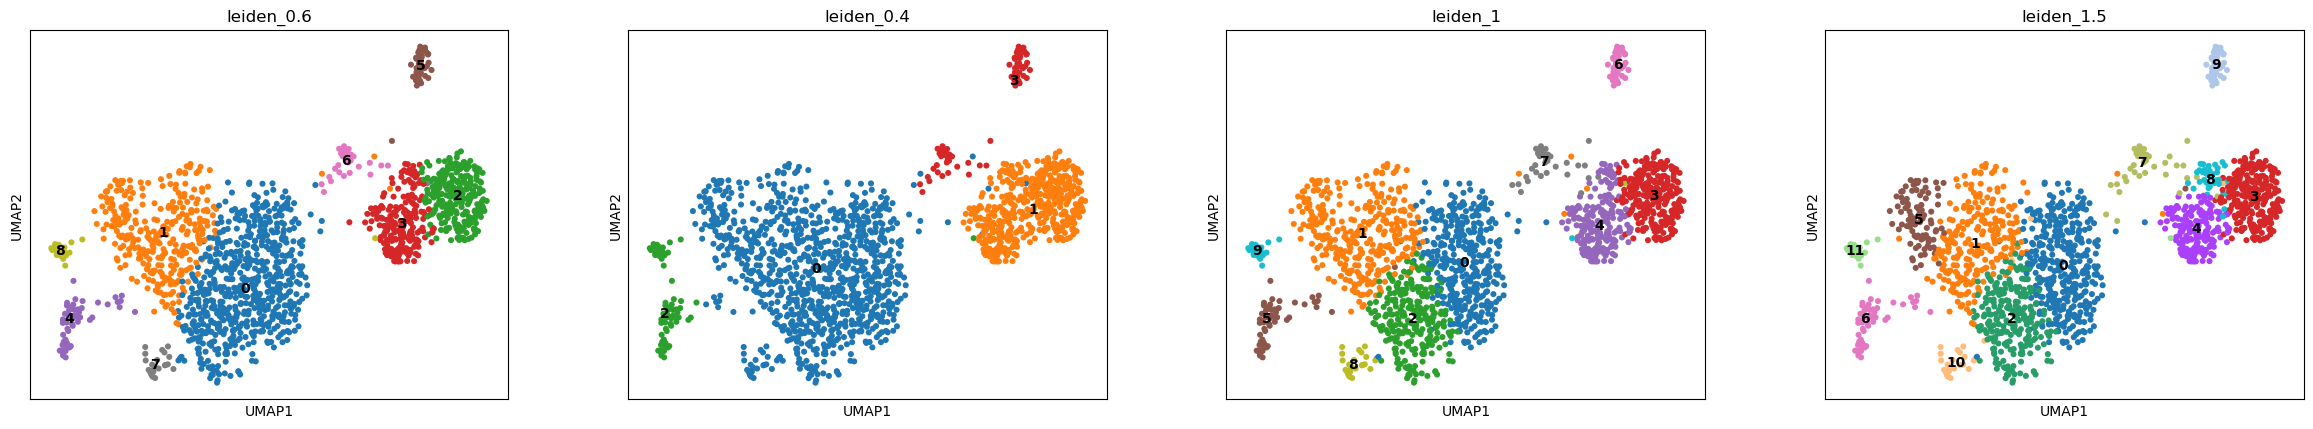

In [61]:
sc.pl.umap(adata,color=['leiden_0.6','leiden_0.4','leiden_1','leiden_1.5'],legend_loc='on data')

In [45]:
!pip3 install leidenalg

   ---------------------------------------- 0.0/2.0 MB ? eta -:--:--
   ---------- ----------------------------- 0.5/2.0 MB 5.6 MB/s eta 0:00:01
   -------------------------- ------------- 1.3/2.0 MB 4.2 MB/s eta 0:00:01
   ---------------------------------------- 2.0/2.0 MB 3.5 MB/s  0:00:00


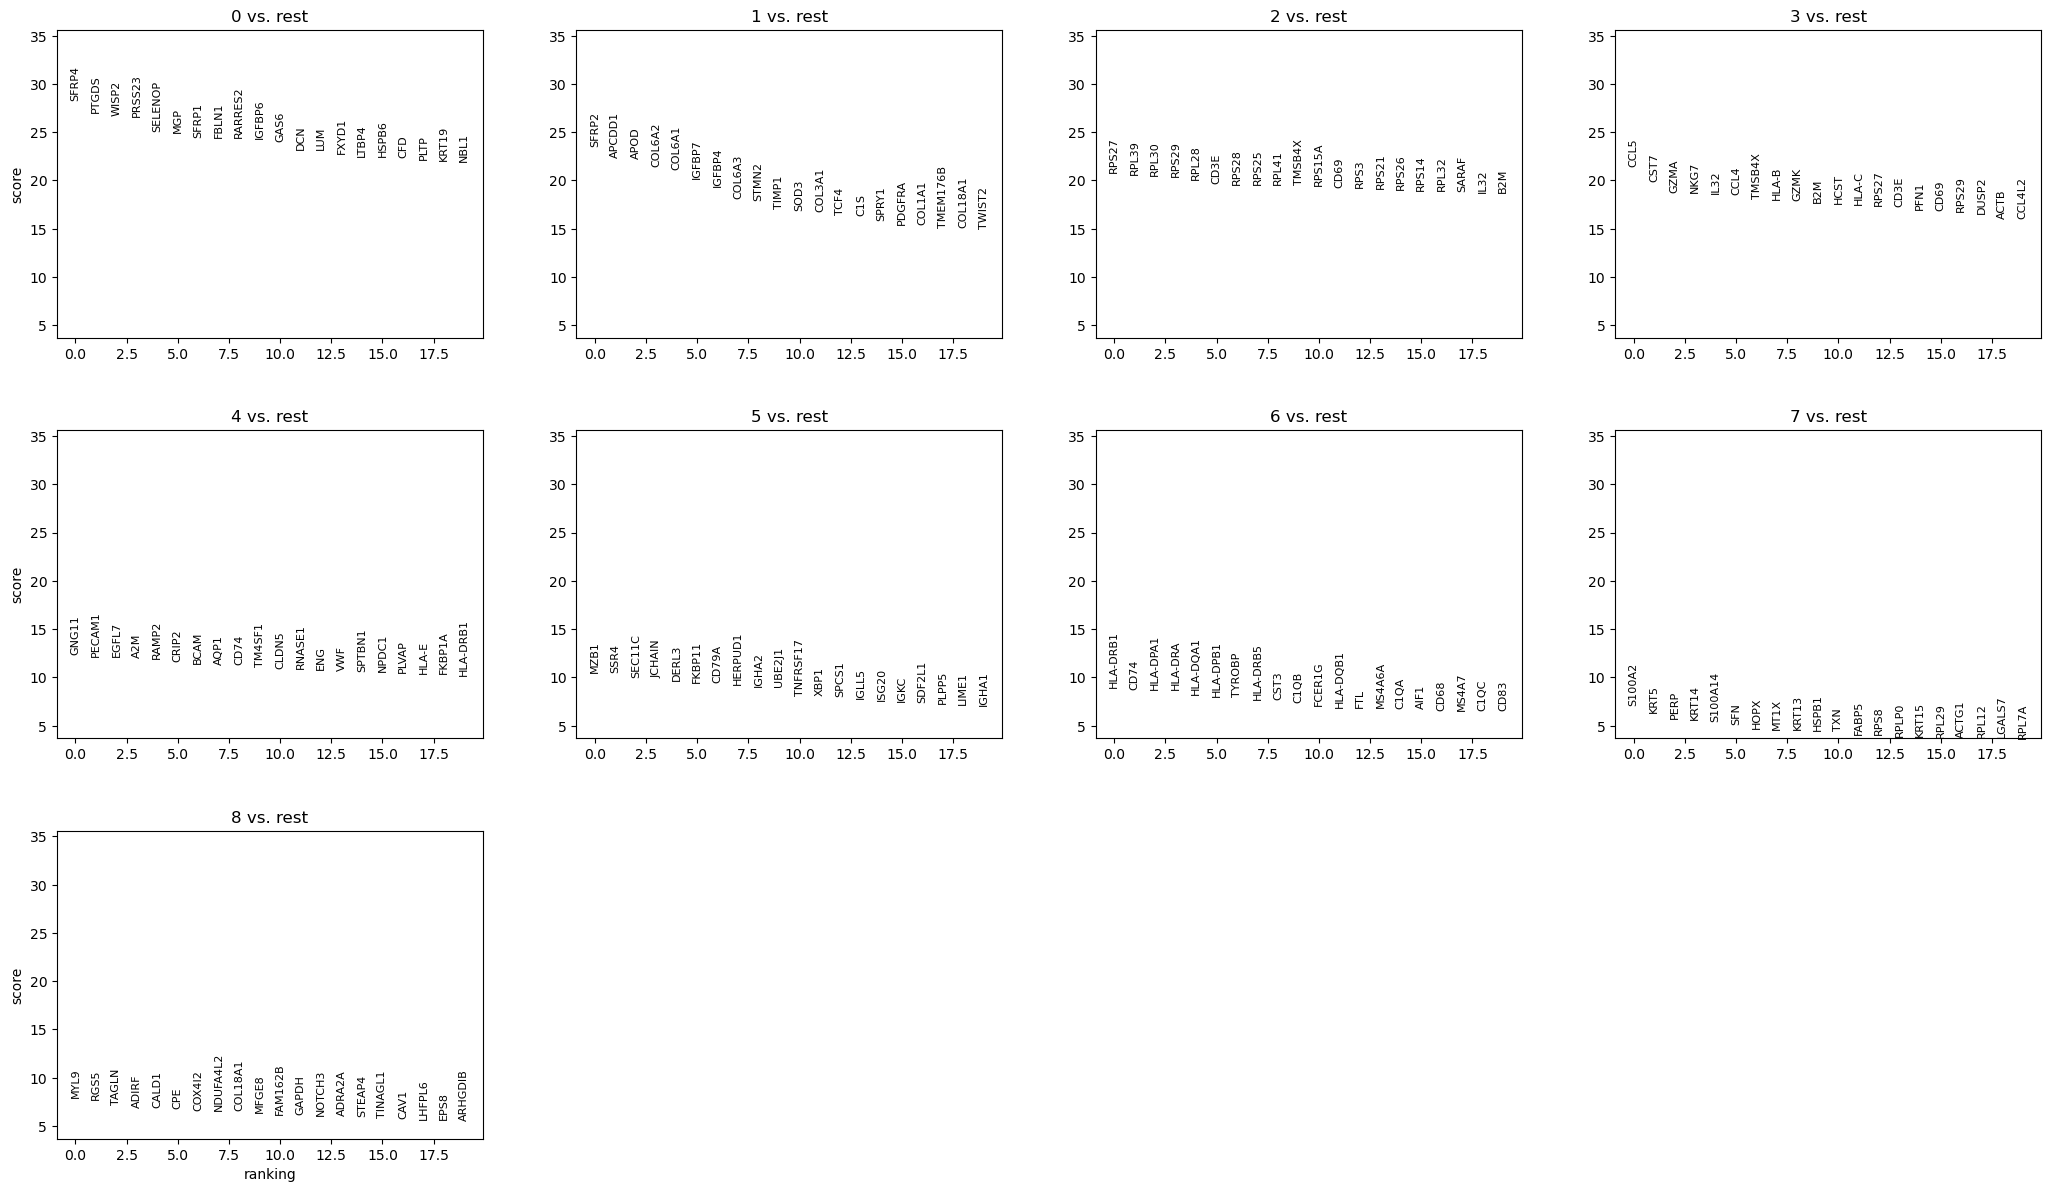

In [25]:
#Enriched genes in each clusters at 0.6 resolution
sc.tl.rank_genes_groups( adata,groupby='leiden_0.6',method='wilcoxon',use_raw=True)
sc.pl.rank_genes_groups(adata)


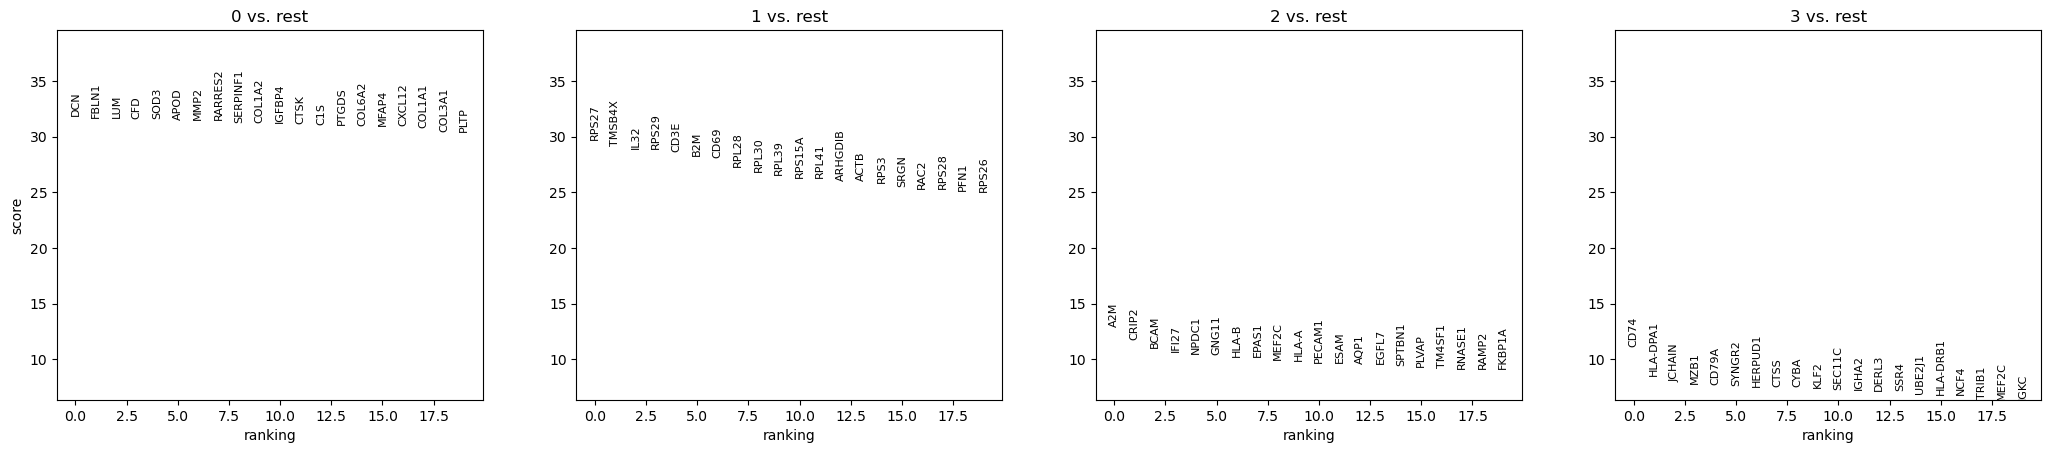

In [62]:
#Enriched genes in each clusters at 0.4 resolution
sc.tl.rank_genes_groups( adata,groupby='leiden_0.4',method='wilcoxon',use_raw=True)
sc.pl.rank_genes_groups(adata)

In [26]:
df=sc.get.rank_genes_groups_df(adata,group='0')
df[['names','logfoldchanges']].head()

,names,logfoldchanges
0,SFRP4,5.108337
1,PTGDS,4.256112
2,WISP2,4.077040
3,PRSS23,3.552794
4,SELENOP,3.104398


In [45]:
# Deep diving into stressed cell states (Hypoxic, ER,inflammatory)
er_stress_genes=['ATF4','DDIT3','XBP1','HSPA5','HSP90B1','HERPUD1','DNAJB9','STC2','ASNS']
hypoxia_stress_gene=['GDF15','PDK4','SLC2A1','LDHA','VEGFA','BNIP3','NDRG1']
infl_stress_genes=['JUN','FOS','FOSB','IL6','NFKBIA','TNFAIP3','CXCL8']


In [46]:
sc.tl.score_genes(adata,er_stress_genes,score_name='stress_er')
sc.tl.score_genes(adata,hypoxia_stress_gene,score_name='stress_hypoxia')


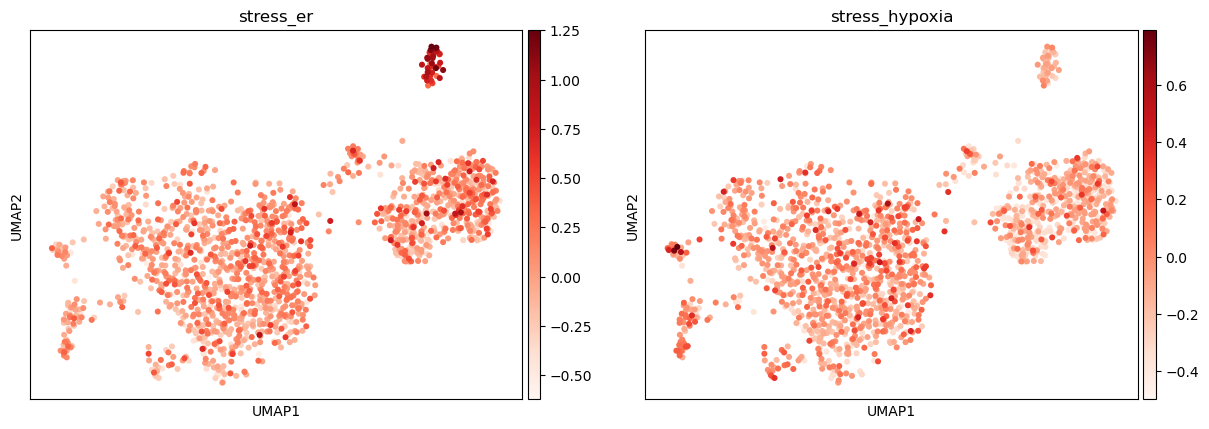

In [47]:
sc.pl.umap(adata,color=['stress_er','stress_hypoxia'],cmap='Reds')

In [48]:
adata.var_names[:100]

Index(['LINC00115', 'KLHL17', 'HES4', 'ISG15', 'TNFRSF18', 'TNFRSF4', 'SCNN1D',
       'AL645728.1', 'CDK11A', 'PRKCZ', 'PLCH2', 'AL139246.5', 'TNFRSF14-AS1',
       'KCNAB2', 'ACOT7', 'TNFRSF25', 'PLEKHG5', 'UTS2', 'TNFRSF9', 'ERRFI1',
       'SLC2A5', 'GPR157', 'SLC25A33', 'PIK3CD', 'CTNNBIP1', 'RBP7',
       'TNFRSF1B', 'PRDM2', 'EFHD2', 'DNAJC16', 'EPHA2', 'CROCC', 'BX284668.6',
       'ATP13A2', 'ALDH4A1', 'OTUD3', 'CDA', 'ALPL', 'HSPG2', 'C1QA', 'C1QC',
       'C1QB', 'ID3', 'NIPAL3', 'RCAN3', 'RUNX3', 'LDLRAP1', 'STMN1', 'PAFAH2',
       'CEP85', 'UBXN11', 'CD52', 'CRYBG2', 'ZNF683', 'RPS6KA1', 'ZDHHC18',
       'SFN', 'SYTL1', 'THEMIS2', 'PTAFR', 'TRNAU1AP', 'EPB41', 'MATN1',
       'LAPTM5', 'TINAGL1', 'FAM167B', 'LCK', 'MARCKSL1', 'S100PBP', 'RNF19B',
       'GJA4', 'KIAA0319L', 'AC004865.2', 'AGO4', 'ZC3H12A', 'SNIP1',
       'AL139260.1', 'COL9A2', 'SMAP2', 'ZFP69', 'AL603839.3', 'CITED4',
       'HIVEP3', 'SLC2A1', 'TIE1', 'ARMH1', 'PLK3', 'TOE1', 'TESK2', 'CYP4X1',
      

In [49]:
adata.var_names.str.contains('ATF4|DDIT3|XBP1').sum()

np.int64(0)

In [50]:
adata.var.head()
adata.var.columns

Index(['gene_ids', 'feature_types', 'mt', 'n_cells', 'n_cells_by_counts',
       'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts',
       'total_counts', 'log1p_total_counts', 'highly_variable', 'means',
       'dispersions', 'dispersions_norm', 'mean', 'std'],
      dtype='object')

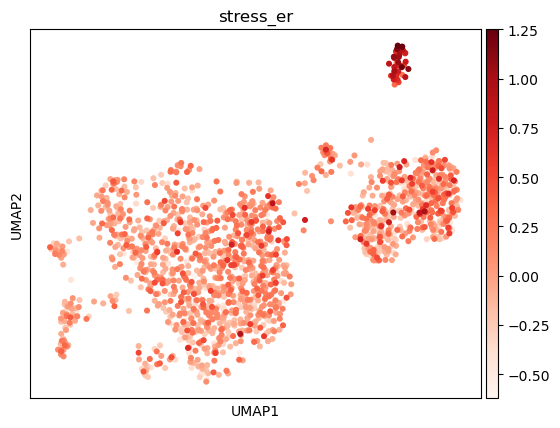

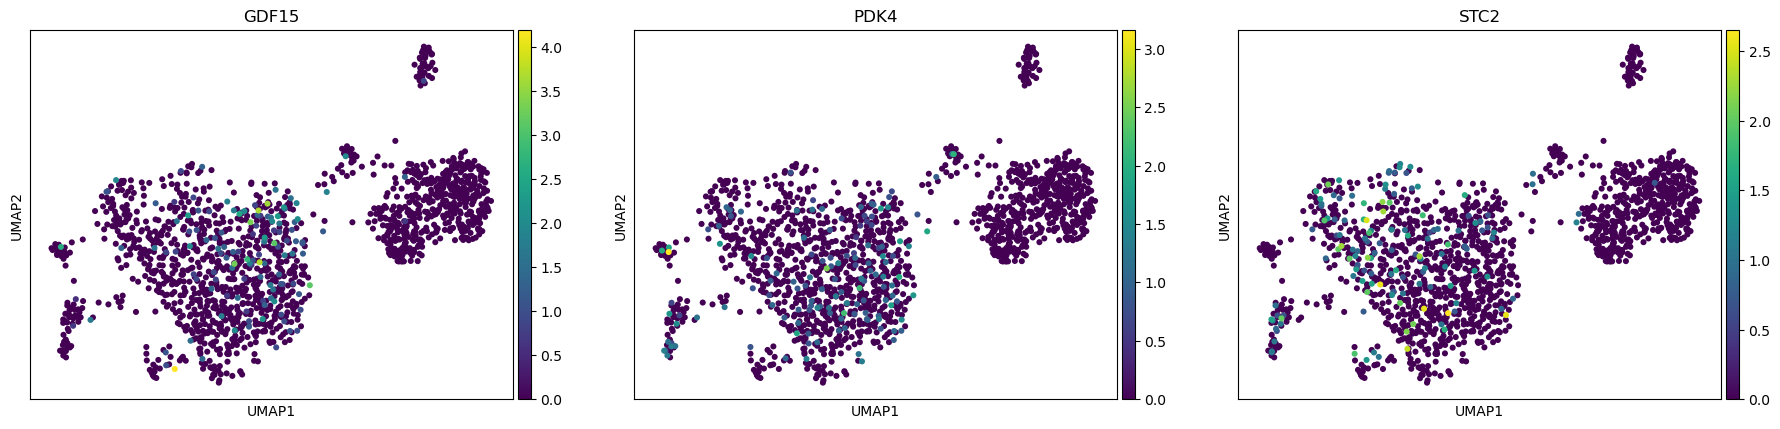

In [51]:
sc.pl.umap(adata,color=['stress_er'],cmap='Reds')
sc.pl.umap(adata,color=['GDF15','PDK4','STC2'])

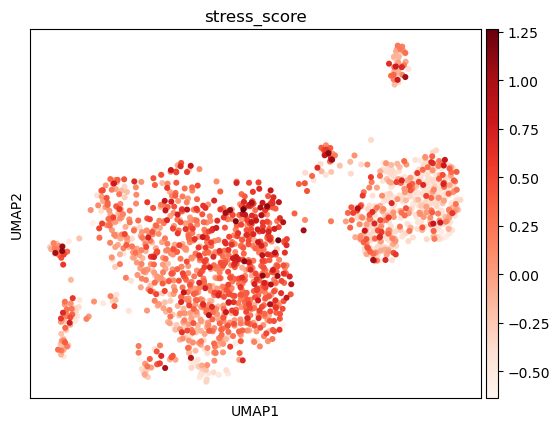

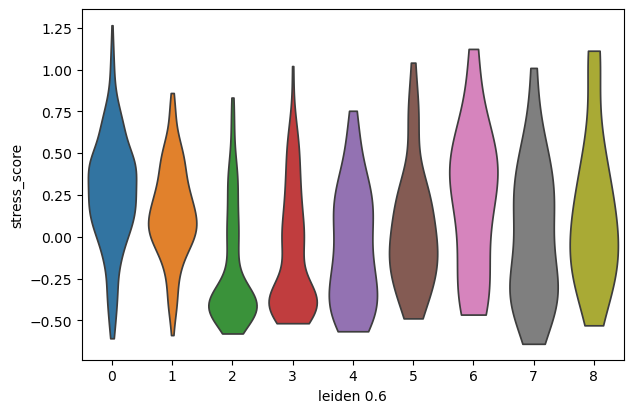

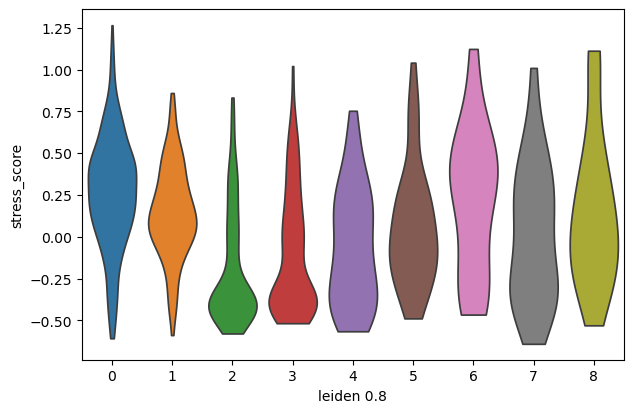

In [52]:
#comparing stress scores wrt stress genes across clusters
stress_genes = ['GDF15','PDK4','STC2','DDIT3','HSPA1A']
sc.tl.score_genes(adata, stress_genes, score_name='stress_score')
sc.pl.umap(adata, color='stress_score',cmap='Reds')
sc.pl.violin(adata,'stress_score',groupby='leiden_0.6',stripplot=False)
sc.pl.violin(adata,'stress_score',groupby='leiden_0.8',stripplot=False)


In [53]:
#identifying cell stress across cell types:
adata.obs['stress_high'] = adata.obs['stress_score'] > adata.obs['stress_score'].quantile(0.75)
adata.obs['stress_high']=adata.obs['stress_high'].astype('category')


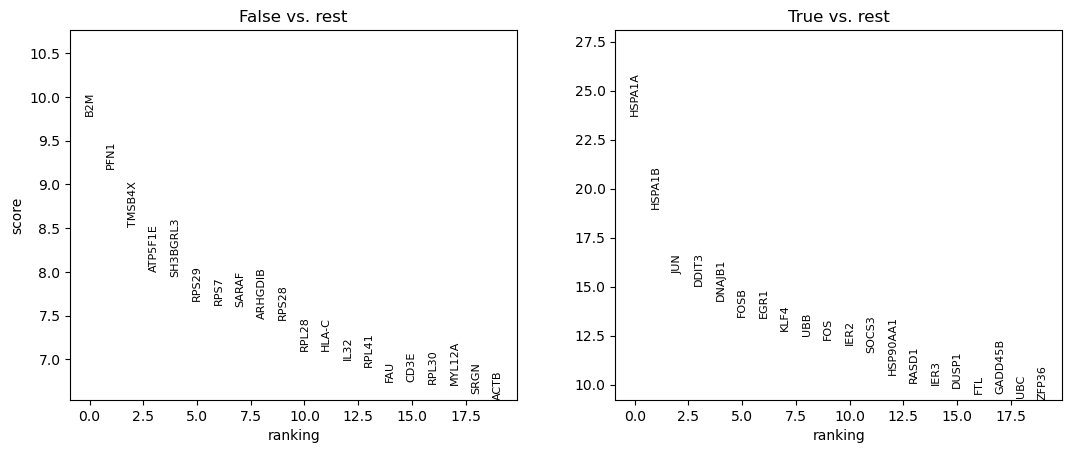

In [54]:
#Validation of genes upregulated in stressed states/Differential expression analysis of high stress cells
sc.tl.rank_genes_groups(adata, 'stress_high', method='wilcoxon')
sc.pl.rank_genes_groups(adata, n_genes=20, sharey=False)

In [55]:
adata.var.head()

,gene_ids,feature_types,mt,n_cells,n_cells_by_counts,mean_counts,log1p_mean_counts,pct_dropout_by_counts,total_counts,log1p_total_counts,highly_variable,means,dispersions,dispersions_norm,mean,std
LINC00115,ENSG00000225880,Gene Expression,False,16,16,0.009351,0.009307,99.119912,17.0,2.890372,True,0.029004,1.480996,0.964488,0.012310,0.133910
KLHL17,ENSG00000187961,Gene Expression,False,15,15,0.008251,0.008217,99.174917,15.0,2.772589,True,0.025862,1.419421,0.832180,0.011237,0.126402
HES4,ENSG00000188290,Gene Expression,False,171,171,0.134213,0.125939,90.594059,244.0,5.501258,True,0.221508,1.388306,0.765322,0.112851,0.367657
ISG15,ENSG00000187608,Gene Expression,False,452,452,0.482948,0.394032,75.137514,878.0,6.778785,True,0.608405,1.629476,0.600226,0.334862,0.618979
TNFRSF18,ENSG00000186891,Gene Expression,False,56,56,0.037954,0.037251,96.919692,69.0,4.248495,True,0.100858,1.680671,1.393535,0.041527,0.249228


In [56]:
adata.var.columns

Index(['gene_ids', 'feature_types', 'mt', 'n_cells', 'n_cells_by_counts',
       'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts',
       'total_counts', 'log1p_total_counts', 'highly_variable', 'means',
       'dispersions', 'dispersions_norm', 'mean', 'std'],
      dtype='object')

In [318]:
adata.var_names = adata.var.index
adata.var_names_make_unique()


In [319]:
adata.var.head()

,gene_ids,feature_types,mt,n_cells_by_counts,mean_counts,log1p_mean_counts,pct_dropout_by_counts,total_counts,log1p_total_counts,highly_variable,means,dispersions,dispersions_norm,mean,std
LINC00115,ENSG00000225880,Gene Expression,False,16,0.009043,0.009002,99.148936,17.0,2.890372,True,0.029016,1.480960,0.989131,0.012316,0.133937
KLHL17,ENSG00000187961,Gene Expression,False,15,0.007979,0.007947,99.202128,15.0,2.772589,True,0.025863,1.418850,0.870177,0.011240,0.126403
HES4,ENSG00000188290,Gene Expression,False,171,0.129787,0.122029,90.904255,244.0,5.501258,True,0.220601,1.389458,0.813886,0.112249,0.366954
ISG15,ENSG00000187608,Gene Expression,False,452,0.467021,0.383234,75.957447,878.0,6.778785,True,0.608170,1.629182,0.605432,0.334632,0.618981
TNFRSF18,ENSG00000186891,Gene Expression,False,56,0.036702,0.036045,97.021277,69.0,4.248495,True,0.100818,1.679119,1.368646,0.041534,0.249188


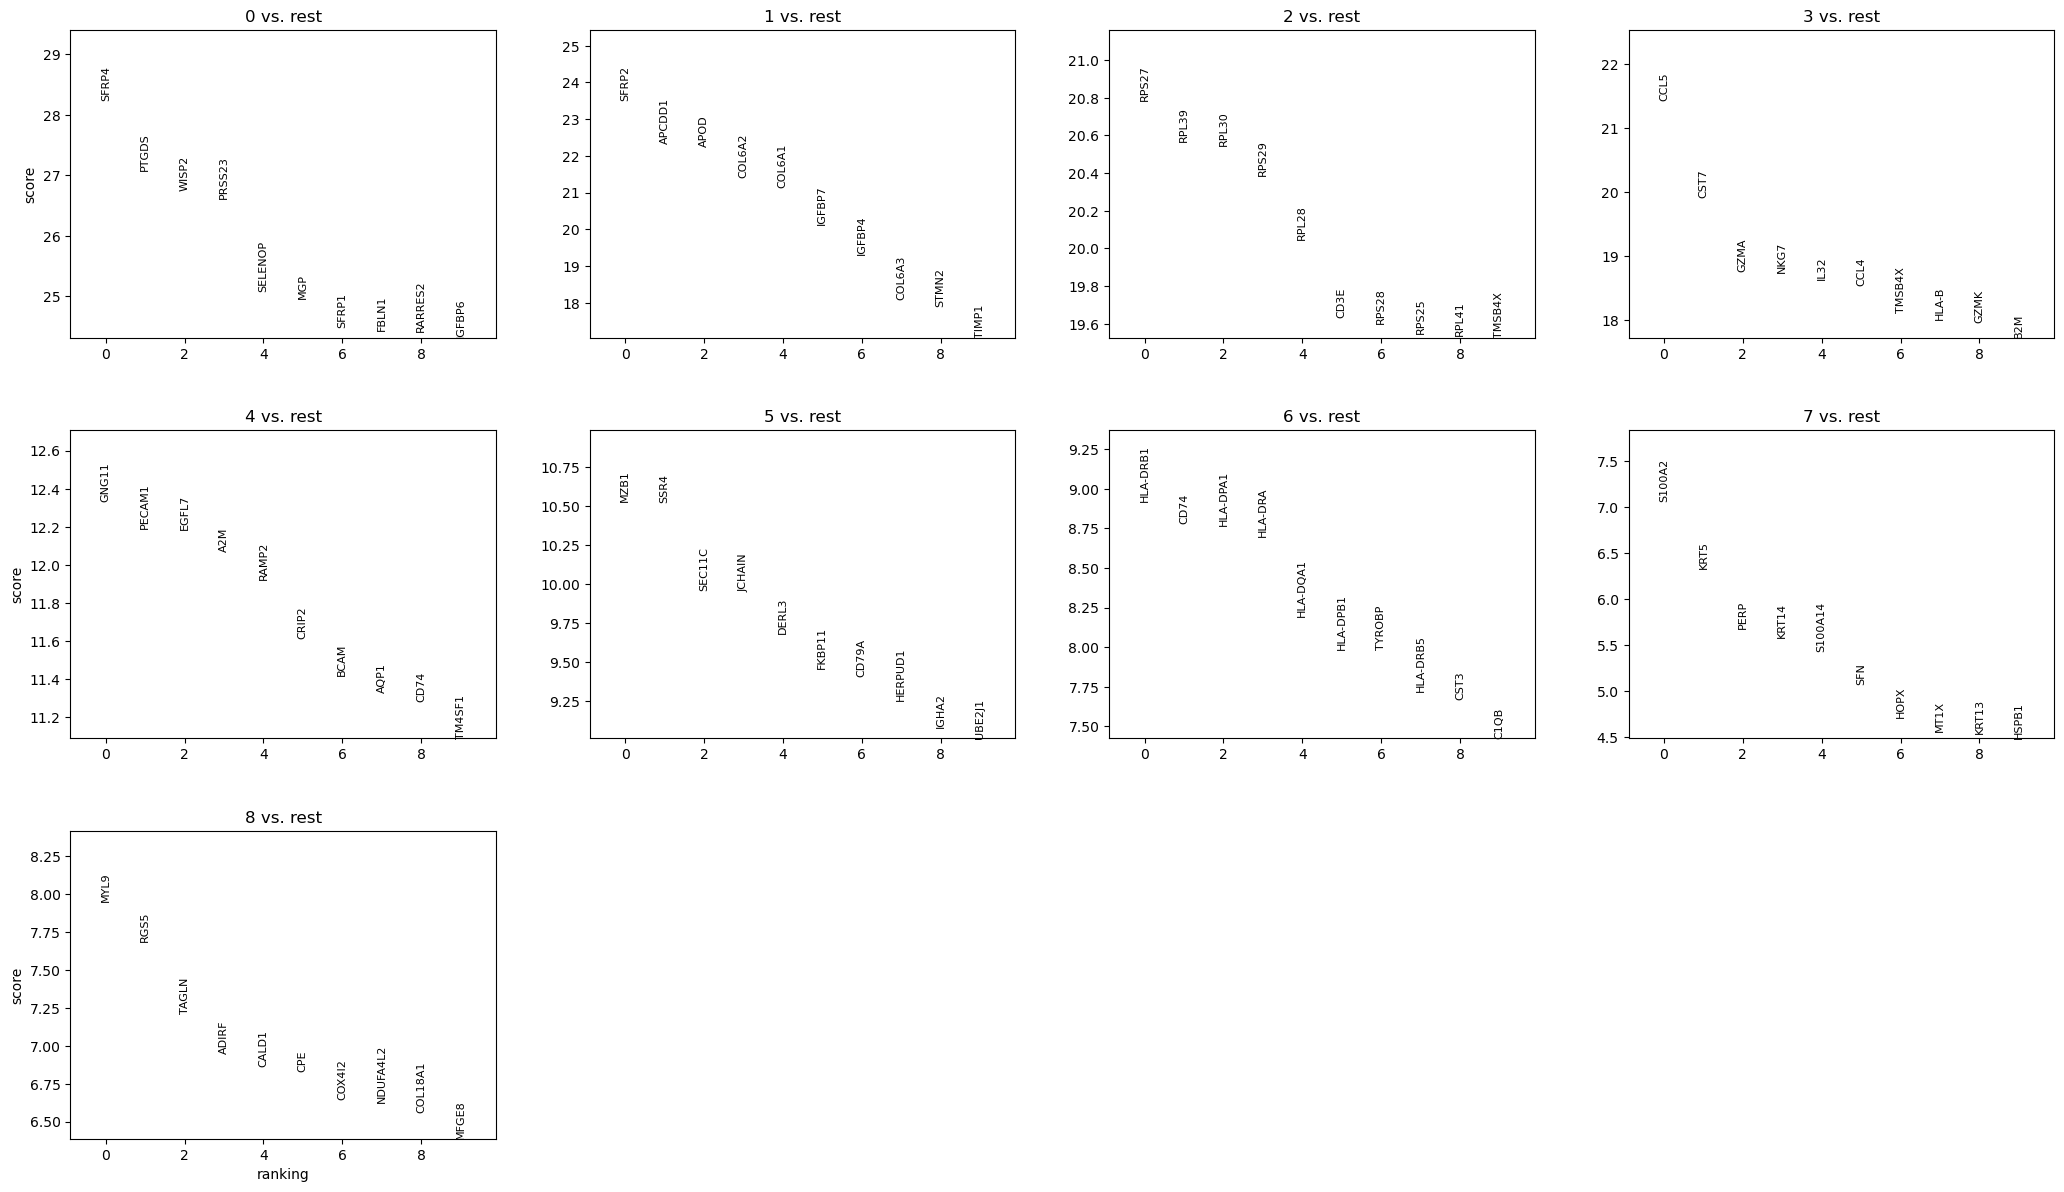

In [63]:
sc.tl.rank_genes_groups(adata, 'leiden_0.6', method='wilcoxon')
sc.pl.rank_genes_groups(adata, n_genes=10, sharey=False)




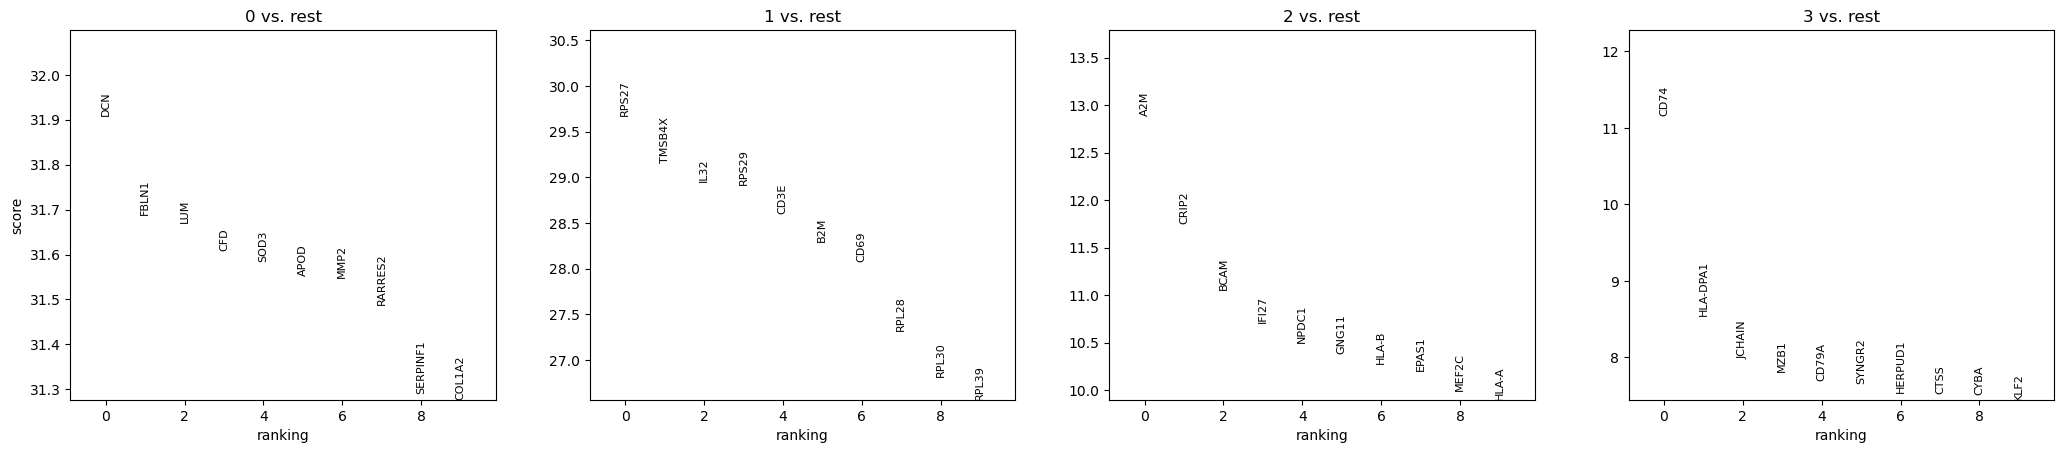

In [65]:
sc.tl.rank_genes_groups(adata, 'leiden_0.4', method='wilcoxon')
sc.pl.rank_genes_groups(adata, n_genes=10, sharey=False)

In [29]:
markers = sc.get.rank_genes_groups_df(adata, group=None)
markers.head()


,group,names,scores,logfoldchanges,pvals,pvals_adj
0,0,SFRP4,28.229305,5.108337,2.555231e-175,4.216131e-171
1,0,PTGDS,27.080307,4.256112,1.679932e-161,1.385944e-157
2,0,WISP2,26.739548,4.077040,1.633683e-157,8.985256e-154
3,0,PRSS23,26.612881,3.552794,4.816093e-156,1.986638e-152
4,0,SELENOP,25.082750,3.104398,7.672103e-139,2.531794e-135


In [67]:
markers_4 = sc.get.rank_genes_groups_df(adata, group=None)
markers_4.head()

,group,names,scores,logfoldchanges,pvals,pvals_adj
0,0,DCN,31.909733,7.209619,1.956685e-223,3.228530e-219
1,0,FBLN1,31.688976,7.815375,2.204132e-220,1.818409e-216
2,0,LUM,31.669800,7.252573,4.048851e-220,2.226868e-216
3,0,CFD,31.607935,7.935465,2.872513e-219,1.184912e-215
4,0,SOD3,31.583906,6.395196,6.141799e-219,2.026794e-215


In [69]:
for clust in markers_4['group'].unique():
    print(f"\nCluster {clust} top genes:")
    print(markers_4[markers_4['group'] == clust].head(10)[['names','logfoldchanges','pvals_adj']])



Cluster 0 top genes:
      names  logfoldchanges      pvals_adj
0       DCN        7.209619  3.228530e-219
1     FBLN1        7.815375  1.818409e-216
2       LUM        7.252573  2.226868e-216
3       CFD        7.935465  1.184912e-215
4      SOD3        6.395196  2.026794e-215
5      APOD        6.863209  4.400851e-215
6      MMP2        6.305609  4.533527e-215
7   RARRES2        6.132729  2.670354e-214
8  SERPINF1        5.857828  1.194074e-211
9    COL1A2        6.995735  1.589489e-211

Cluster 1 top genes:
        names  logfoldchanges      pvals_adj
16500   RPS27        1.584545  2.572106e-189
16501  TMSB4X        2.203553  4.947982e-183
16502    IL32        6.708633  1.199508e-180
16503   RPS29        2.264433  2.637808e-180
16504    CD3E        8.213240  1.381842e-176
16505     B2M        1.483298  8.359687e-173
16506    CD69        8.420347  2.756760e-170
16507   RPL28        1.435027  1.906914e-161
16508   RPL30        1.184020  1.633098e-155
16509   RPL39        1.233404  8.

In [30]:
for clust in markers['group'].unique():
    print(f"\nCluster {clust} top genes:")
    print(markers[markers['group'] == clust].head(10)[['names','logfoldchanges','pvals_adj']])



Cluster 0 top genes:
     names  logfoldchanges      pvals_adj
0    SFRP4        5.108337  4.216131e-171
1    PTGDS        4.256112  1.385944e-157
2    WISP2        4.077040  8.985256e-154
3   PRSS23        3.552794  1.986638e-152
4  SELENOP        3.104398  2.531794e-135
5      MGP        3.526509  3.821766e-134
6    SFRP1        3.124874  4.881890e-129
7    FBLN1        4.241579  1.772886e-128
8  RARRES2        3.208703  2.255694e-128
9   IGFBP6        3.181367  2.395072e-127

Cluster 1 top genes:
        names  logfoldchanges      pvals_adj
16500   SFRP2        4.431530  7.989303e-118
16501  APCDD1        3.976259  1.585506e-106
16502    APOD        3.779198  5.418646e-106
16503  COL6A2        2.887014   5.936316e-98
16504  COL6A1        2.762966   1.214517e-95
16505  IGFBP7        3.093343   9.056959e-87
16506  IGFBP4        2.795289   8.906298e-80
16507  COL6A3        2.468436   1.003941e-69
16508   STMN2        3.624820   2.852895e-68
16509   TIMP1        2.049425   6.390219e-62

In [70]:
markers_strong_4 = markers_4[
    (markers_4['pvals_adj'] < 0.05) & 
    (markers_4['logfoldchanges'] > 0.25)
]

markers_strong_4.groupby('group').head(10)

C:\Users\faizm\AppData\Local\Temp\ipykernel_24032\2631813481.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  markers_strong_4.groupby('group').head(10)


,group,names,scores,logfoldchanges,pvals,pvals_adj
0,0,DCN,31.909733,7.209619,1.956685e-223,3.228530e-219
1,0,FBLN1,31.688976,7.815375,2.204132e-220,1.818409e-216
2,0,LUM,31.669800,7.252573,4.048851e-220,2.226868e-216
3,0,CFD,31.607935,7.935465,2.872513e-219,1.184912e-215
4,0,SOD3,31.583906,6.395196,6.141799e-219,2.026794e-215
5,0,APOD,31.553600,6.863209,1.600309e-218,4.400851e-215
6,0,MMP2,31.547779,6.305609,1.923315e-218,4.533527e-215
7,0,RARRES2,31.487341,6.132729,1.294717e-217,2.670354e-214
8,0,SERPINF1,31.289356,5.857828,6.513131e-215,1.194074e-211
9,0,COL1A2,31.276857,6.995735,9.633269e-215,1.589489e-211


In [31]:
markers_strong = markers[
    (markers['pvals_adj'] < 0.05) & 
    (markers['logfoldchanges'] > 0.25)
]

markers_strong.groupby('group').head(10)


C:\Users\faizm\AppData\Local\Temp\ipykernel_24032\590395349.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  markers_strong.groupby('group').head(10)


,group,names,scores,logfoldchanges,pvals,pvals_adj
0,0,SFRP4,28.229305,5.108337,2.555231e-175,4.216131e-171
1,0,PTGDS,27.080307,4.256112,1.679932e-161,1.385944e-157
2,0,WISP2,26.739548,4.077040,1.633683e-157,8.985256e-154
3,0,PRSS23,26.612881,3.552794,4.816093e-156,1.986638e-152
4,0,SELENOP,25.082750,3.104398,7.672103e-139,2.531794e-135
...,...,...,...,...,...,...
132005,8,CPE,6.826005,5.937012,8.731186e-12,2.401076e-08
132006,8,COX4I2,6.644301,9.224180,3.046593e-11,7.136839e-08
132007,8,NDUFA4L2,6.625520,8.422166,3.460285e-11,7.136839e-08
132008,8,COL18A1,6.557862,3.337325,5.458484e-11,1.000722e-07


In [71]:
#validating with PanglaoDB
import gseapy as gp

def enrich_cluster(cluster_id):
    genes = markers_strong_4[markers_strong_4['group']==cluster_id]['names'].head(50).tolist()
    enr = gp.enrichr(
        gene_list=genes,
        gene_sets='PanglaoDB_Augmented_2021',
        organism='Human',
        outdir=None
    )
    return enr.results[['Term','Adjusted P-value','Overlap']].head(5)

for cl in markers_strong_4['group'].unique():
    print(f"\nCluster {cl}")
    print(enrich_cluster(cl))



Cluster 0
                        Term  Adjusted P-value Overlap
0                Fibroblasts      8.682355e-36  26/232
1  Pancreatic Stellate Cells      1.371751e-33  21/111
2     Hepatic Stellate Cells      4.748989e-32  21/132
3                 Adipocytes      1.524230e-31  23/210
4               Chondrocytes      2.749858e-31  21/146

Cluster 1
                        Term  Adjusted P-value Overlap
0                 Thymocytes      1.255065e-11  10/118
1                    T Cells      1.844372e-10  10/165
2                   NK Cells      2.450863e-09   9/157
3  T Follicular Helper Cells      3.080737e-09   8/110
4              T Cells Naive      5.226661e-08   7/102

Cluster 2
                        Term  Adjusted P-value Overlap
0          Endothelial Cells      4.488857e-37  27/246
1  Endothelial Cells (Aorta)      1.051935e-12  12/185
2        Loop Of Henle Cells      7.731837e-11  10/147
3   Hematopoietic Stem Cells      1.125504e-08   9/178
4                 Mast Cells    

In [32]:
#validating with PanglaoDB
import gseapy as gp

def enrich_cluster(cluster_id):
    genes = markers_strong[markers_strong['group']==cluster_id]['names'].head(50).tolist()
    enr = gp.enrichr(
        gene_list=genes,
        gene_sets='PanglaoDB_Augmented_2021',
        organism='Human',
        outdir=None
    )
    return enr.results[['Term','Adjusted P-value','Overlap']].head(5)

for cl in markers_strong['group'].unique():
    print(f"\nCluster {cl}")
    print(enrich_cluster(cl))



Cluster 0
                      Term  Adjusted P-value Overlap
0             Leydig Cells      8.834582e-21  16/145
1  Peritubular Myoid Cells      1.597149e-20  15/120
2              Fibroblasts      1.434224e-19  17/232
3               Adipocytes      9.789639e-19  16/210
4   Hepatic Stellate Cells      1.263775e-16  13/132

Cluster 1
                        Term  Adjusted P-value Overlap
0  Pancreatic Stellate Cells      5.438205e-31  20/111
1     Hepatic Stellate Cells      1.146156e-29  20/132
2                Fibroblasts      2.213213e-28  22/232
3               Chondrocytes      4.953291e-27  19/146
4                Osteoblasts      1.093551e-26  19/154

Cluster 2
             Term  Adjusted P-value Overlap
0         T Cells          0.000006   7/165
1      Thymocytes          0.000008   6/118
2         B Cells          0.000068   6/182
3  T Memory Cells          0.000171   5/133
4        NK Cells          0.000303   5/157

Cluster 3
                Term  Adjusted P-value Overl

In [38]:
marker_dict = {
    "T_cells": ["CD3D", "CD3E", "TRBC1", "TRAC"],
    "CD4_T": ["CD4", "IL7R", "CCR7", "LTB"],
    "CD8_T": ["CD8A", "CD8B", "NKG7", "GZMB"],
    "NK_cells": ["NKG7", "GNLY", "GZMA", "GZMB"],
    "B_cells": ["MS4A1", "CD79A", "CD37", "HLA-DRA"],
    "Plasma_cells": ["MZB1", "JCHAIN", "IGHA1", "IGKC"],
    "Dendritic_cells": ["HLA-DRA", "CD74", "ITGAX", "FCER1A"],
    "Macrophages": ["LYZ", "CST3", "TYROBP", "C1QB"],
    "Endothelial": ["PECAM1", "VWF", "RAMP2", "EGFL7"],
    "Pericytes": ["RGS5", "TAGLN", "MYL9", "CALD1"],
    "Fibroblasts": ["COL1A1", "COL1A2", "DCN", "LUM"],
    "Basal_epithelial": ["KRT5", "KRT14", "S100A2", "TP63"]
}

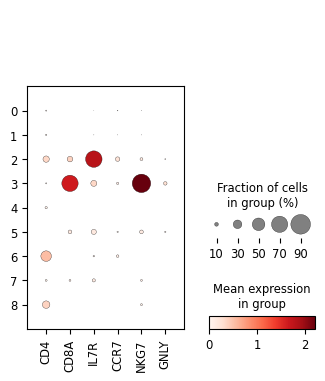

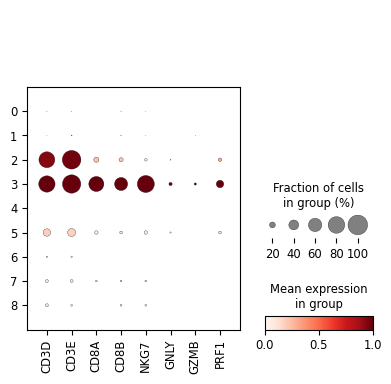

In [33]:
#Checking if  cluster 2 & 3 has cd4 or cd8
sc.pl.dotplot(
    adata,
    ['CD4','CD8A','IL7R','CCR7','NKG7','GNLY'],
    groupby='leiden_0.6'
)
sc.pl.dotplot(
    adata,
    ['CD3D','CD3E','CD8A','CD8B','NKG7','GNLY','GZMB','PRF1'],
    groupby='leiden_0.6',
    standard_scale='var'
)

In [ ]:
#validation of marker cell type with dotplot
sc.pl.dotplot(
    adata, 
    marker_dict, 
    groupby='leiden_0.4', 
    standard_scale='var', 
    figsize=(12,8),
    dendrogram=True
)

categories: 0, 1, 2, etc.
var_group_labels: T_cells, CD4_T, CD8_T, etc.


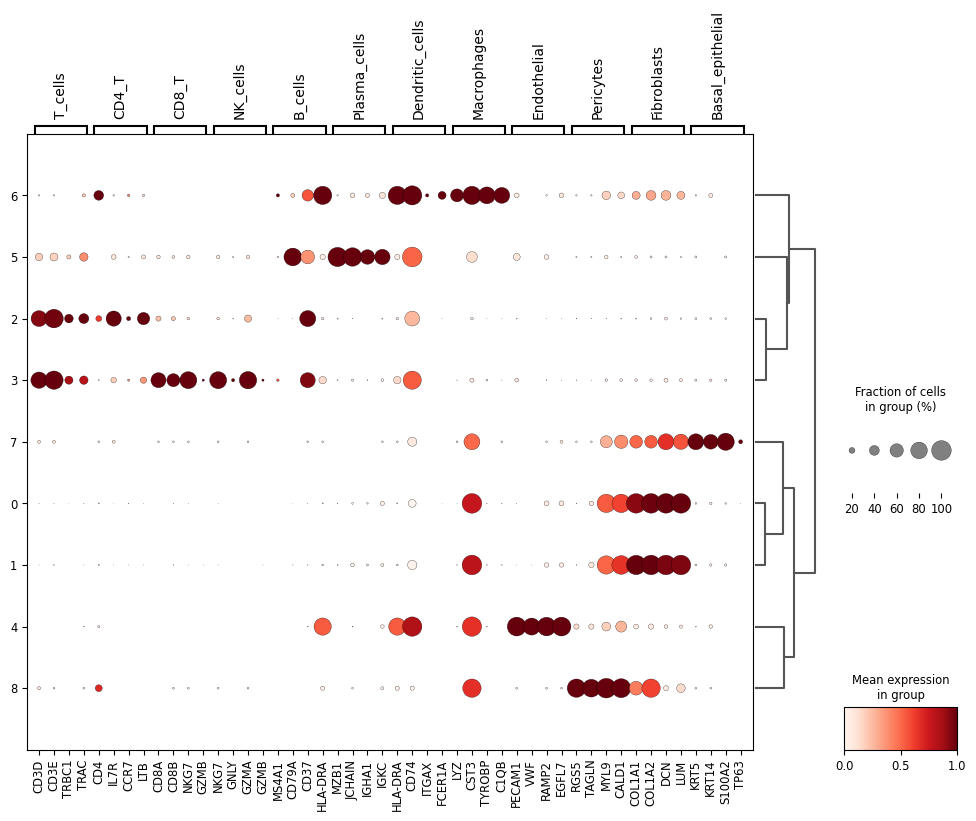

In [40]:
#validation of marker cell type with dotplot
sc.pl.dotplot(
    adata, 
    marker_dict, 
    groupby='leiden_0.6', 
    standard_scale='var', 
    figsize=(12,8),
    dendrogram=True
)

In [41]:
cluster_map = {
    "0": "Fibroblasts",
    "1": "Stellate / Fibroblast-like",
    "2": "T cells",
    "3": "Cytotoxic T / NK cells",
    "4": "Endothelial cells",
    "5": "Plasma cells",
    "6": "Dendritic / Macrophages",
    "7": "Basal epithelial cells",
    "8": "Pericytes",
    "9": "Endothelial (activated)",
    "10": "Other",
    "11": "Other",
    "12": "DC (MHC-II+)"
}

adata.obs["cell_type"] = adata.obs["leiden"].map(cluster_map)


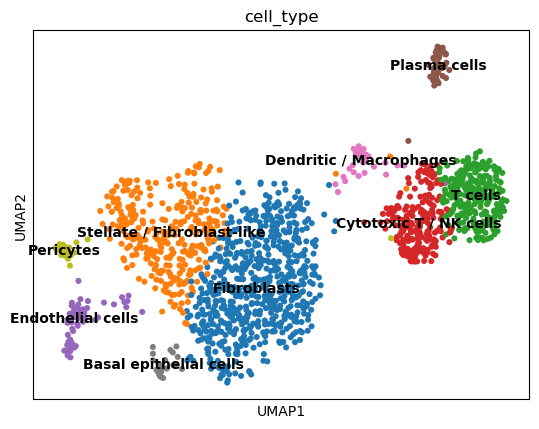

In [42]:
sc.pl.umap(adata, color="cell_type", legend_loc="on data")


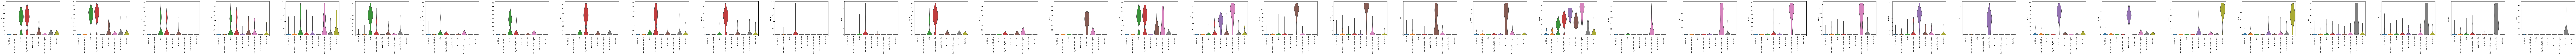

In [44]:

# Flatten all markers into a list for violin plot

violin_markers = [gene for genes in marker_dict.values() for gene in genes if gene in adata.var_names]
sc.pl.violin(
    adata, 
    violin_markers, 
    groupby='cell_type', 
    rotation=90,
    size=3,
    stripplot=False
)
